# Analysis on error of Monte-Carlo estimation 

**Yuning Zhang, TU Delft, 2021.11.1**

In [ ]:
using Plots
using LsqFit
import ProgressMeter: @showprogress
include("SpinEnsemble.jl")

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


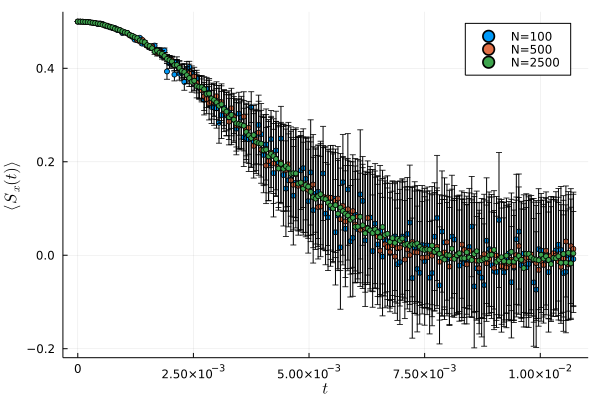

In [275]:
# plot the decay curve using the direct production
sampling_size=[100,500,2500]
fig=plot()
for k in sampling_size
    fid=@showprogress map(t->f_sampling(t,D,h;N=k),T)
    scatter!(T,[x[1] for x in fid],yerrors=[x[2] for x in fid],markersize=3;FID_plot_options...,labels="N=$k")
end
display(fig)

In [299]:
sampling_size=300:100:3000
# t=T[150]
M=length(sampling_size)
f_var=zeros(M)
@showprogress for i in 1:M
    arr=[f_sampling(t,D,h;N=sampling_size[i])[1] for t in rand(T[150:151],100)]
    f_var[i]=var(arr)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


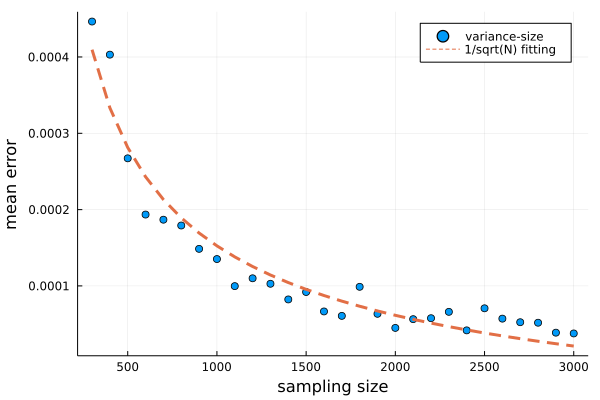

In [338]:
scatter(sampling_size,f_var,label="variance-size")
error_model(N,p)=p[1]./sqrt.(N.-1).+p[2]
fit = curve_fit(error_model, sampling_size, f_var, [1.0,0.0])
plot!(sampling_size,error_model(sampling_size,fit.param),linestyle=:dash,linewidth=3,
#     yerrors=fit.resid,
    xlabel="sampling size",
    ylabel="mean error",
    label="1/sqrt(N) fitting ")

In [339]:
println("fitting parameters: ",fit.param)

fitting parameters: [0.009815081571386912, -0.00015805038520792068]


In [340]:
println("fitting error: ", sum(fit.resid.^2))

fitting error: 1.799179447735085e-8
